# Math599 2022S

## ML-exam

Name:  

Student ID #:  

Please read the instructions carefully:
1. Write your **name** and **Student ID #** first.
2. You are allowed to use the internet, but you are **NOT allowed to communicate** with others in any form.
3. Different problems might use same variable names.  Make sure you use the right one to answer the problem.
4. If the answer is too long, it is enough write **two digits after the decimal point**.
5. Please copy your answer and paste it into the Markdown cell with "_Your answer:_".
6. Run the next cell first.  Then you may start.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ver = "B"

---

###### Problem 1 [2pt]

Let  
```python 
data = np.genfromtxt("p1-%s.csv"%ver, delimiter=",")
```
If you project the points (rows) in `data` onto its 0-th and 1-st principal components, then you will see a four-letter word in upper case.  
What is the word?  
(Note the word might be upside down or left/right mirrored.)

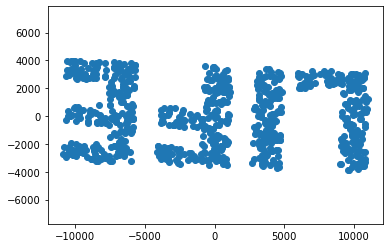

In [2]:
### your code to reach the answer
data = np.genfromtxt("p1-%s.csv"%ver, delimiter=",")

from sklearn.decomposition import PCA
model = PCA(2)
X_new = model.fit_transform(data)

plt.axis("equal")
plt.scatter(*X_new.T)

_Your answer:_ LIFE

###### Problem 2 [2pt]

Let  
```python
dist = np.genfromtxt("p2-%s.csv"%ver, delimiter=",")
```
be the distance matrix of a dataset.  
Use MDS to reconstruct the dataset in $\mathbb{R}^2$.  
Then draw the scatter plot of them.  
You are supposed to see one of the four suit symbols:

- spade ♠
- heart ♥
- diamond ♦
- club ♣

What do you see?  

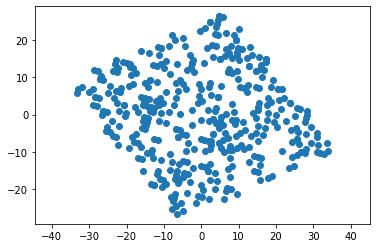

In [3]:
### your code to reach the answer
dist = np.genfromtxt("p2-%s.csv"%ver, delimiter=",")

from sklearn.manifold import MDS
model = MDS(dissimilarity="precomputed")
X_new = model.fit_transform(dist)

plt.axis("equal")
plt.scatter(*X_new.T)

_Your answer:_ diamond

###### Problem 3 [2pt]

Let  
```python
X = np.genfromtxt("p3-%s.csv"%ver, delimiter=",")
y = np.array([0]*50 + [1]*50 + [2]*50 + [3]*50)
w = np.array([0,0,0,0])
```
Suppose after training a $k$-means model with the data `X` ,  
the output label array is `y` .  
What is the predicted label of `w` under this setting?

In [4]:
### your code to reach the answer
X = np.genfromtxt("p3-%s.csv"%ver, delimiter=",")
y = np.array([0]*50 + [1]*50 + [2]*50 + [3]*50)
w = np.array([0,0,0,0])

centers = np.zeros((4,X.shape[1]))
for i in range(4):
    centers[i] = X[y == i].mean(axis=0)
    
dist = np.sqrt(np.sum((centers - w) ** 2, axis=1))
dist.argmin()

1

_Your answer:_ 1

###### Problem 4 [2pt]

Let 
```python
X = np.genfromtxt("p4-%s.csv"%ver, delimiter=",")
```
One of the data points (rows) in `X` is an obvious outlier.  
Use DBSCAN to find its index.  

In [5]:
### your code to reach the answer
X = np.genfromtxt("p4-%s.csv"%ver, delimiter=",")

from sklearn.cluster import DBSCAN
model = DBSCAN()
y_new = model.fit_predict(X)

np.where(y_new == -1)

(array([648]),)

_Your answer:_ 648

###### Problem 5 [2pt]

Let  
```python
data = np.genfromtxt("p5-%s.csv"%ver, delimiter=",")
x,y = data.T
```
Let $x_i$ and $y_i$ be the entries in `x` and `y` , respectively.  
Let $f(x) = 3 + 4x$.  
Find the value $\sum_{i} (f(x_i) - y_i)^2$.  

In [6]:
### your code to reach the answer
data = np.genfromtxt("p5-%s.csv"%ver, delimiter=",")
x,y = data.T

np.sum((3 + 4*x - y)**2) 

0.6588026544945301

_Your answer:_ ~0.65

###### Problem 6 [2pt]

Let  
```python
data = np.genfromtxt("p6-%s.csv"%ver, delimiter=",")
x,y = data.T
```
Let $x_i$ and $y_i$ be the entries in `x` and `y` , respectively.  
Let $f(x) = c_2x^2 + c_4x^4$.  
Find $c_2, c_4$ such that $\sum_{i} (f(x_i) - y_i)^2$ is minimized.

In [7]:
### your code to reach the answer
data = np.genfromtxt("p6-%s.csv"%ver, delimiter=",")
x,y = data.T

X = x[:,np.newaxis] ** np.array([2,4])
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
model.coef_

array([ 4.00031613, -1.0000116 ])

_Your answer:_ $c_2 \sim 4.00$, $c_4 \sim -1.00$

###### Problem 7 [2pt]

Let 
```python
path = "p7-%s"%ver
```
There are 100 pictures in the `path` folder,  
where `digits00` ~ `digits49` are pictures of hand-written digit 0,  
while `digits50` ~ `digits99` are pictures of hand-written digit 1.  
Train an $k$-nearest neighbor classification model with `k = 5` .  
Then predict what is the hand-written digit (0 or 1) in `blur.png` .

In [8]:
### your code to reach the answer
path = "p7-%s"%ver

import os
from PIL import Image
X = np.zeros((100, 28, 28), dtype=int)
for j in range(100):
    img = Image.open(os.path.join(path, "digit%02d.png"%j))
    X[j] = np.array(img)
X_flat = X.reshape(100, 28*28)
y = np.array([0]*50 + [1]*50)

img = Image.open(os.path.join(path, "blur.png"))
blur = np.array(img)
blur_flat = blur.reshape(1, 28*28)

from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(5)
model.fit(X_flat, y)
y_new = model.predict(blur_flat)
y_new

array([0])

_Your answer:_ 0

###### Problem 8 [2pt]

Let  
```python
y = np.genfromtxt("p8-%s.csv"%ver, delimiter=",")
```
The array `y` contains 1000 labels,  
representing the three categories `0, 1, 2` .  
Find the Gini impurity of `y` .

In [9]:
### your code to reach the answer
y = np.genfromtxt("p8-%s.csv"%ver, delimiter=",")

dtrib = np.unique(y, return_counts=True)[1]
prob = dtrib / dtrib.sum()
np.sum(prob * (1 - prob))

0.56

_Your answer:_ ~0.56

###### Problem 9 [2pt]

Let  
```python
X = np.genfromtxt("p9-%s.csv"%ver, delimiter=",")
```
Train $k$-means models with `k = 1,2,...,10`  
and find the corresponding inertias.  
Use the elbow method to suggest the number of clusters in `X` .

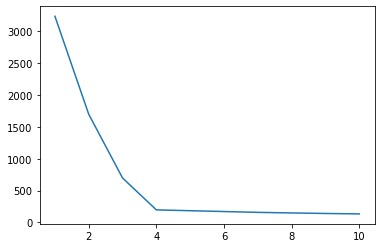

In [10]:
### your code to reach the answer
X = np.genfromtxt("p9-%s.csv"%ver, delimiter=",")

from sklearn.cluster import KMeans

inertias = []
for k in range(1,11):
    model = KMeans(k)
    model.fit(X)
    inertias.append(model.inertia_)
    
plt.plot(np.arange(1,11), inertias)

_Your answer:_ 4

###### Problem 10 [2pt]

Let  
```python 
X = np.genfromtxt("p10-%s.csv"%ver, delimiter=",")
```
It is known that the points (rows) in `X` look like three layers of spheres centered at the origin.  
Find their radii.  

Recall that the radius of a sphere centered at the origin is $\sqrt{x^2 + y^2 + z^2}$  
for any point $(x,y,z)$ on the sphere.  

In [11]:
### your code to reach the answer
X = np.genfromtxt("p10-%s.csv"%ver, delimiter=",")

radii = np.sqrt(np.sum(X**2, axis=1))[:,np.newaxis]
from sklearn.cluster import KMeans
model = KMeans(3)
model.fit(radii)

model.cluster_centers_

array([[2.        ],
       [1.41421356],
       [2.44948974]])

_Your answer:_ ~1.41, ~2, ~2.44

###### Problem 11 [extra 2pt]

Suppose your have 1000 pictures of pictures and  
they are labeled by either `0` for dogs or `1` for cats.  
If you want to train a model to make a prediction of other pictures  
on whether they are pictures of dogs or cats,  
which model you would choose.  

Choose from one of the following:  

1. PCA
2. MDS
3. KMeans
4. DBSCAN
5. LinearRegression
6. PolynomialRegression
7. KNeighborsClassifier
8. DecisionTreeClassifier

The answer might not be unique.  
Add one or two sentences to justify your choice.

_Your answer:_ Either 7 or 8 is okay, since it is a classification problem.

---  
Exam ends here.  
Total point = 20 (+2)

In [ ]:
### points for each problem
pts = [0,0,0,0,0, 
       0,0,0,0,0, 
       0]
total = sum(pts)
print("Your total score =", total)